<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/PMdarimaimport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.6MB/s 
     |████████████████████████████████| 9.5MB 22.7MB/s 
     |████████████████████████████████| 2.1MB 59.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [13]:
import pmdarima as pm
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcci.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['i'] = dfa['i']
df['i'] = pd.to_numeric(df['i'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

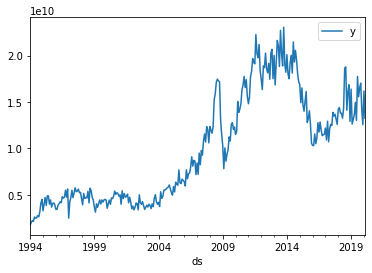

In [28]:
df.plot()

In [29]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.5801543717787687, True)

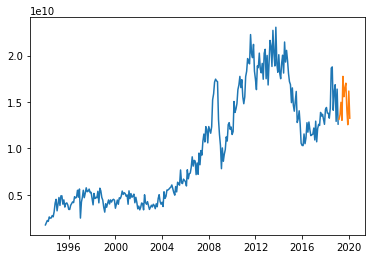

In [30]:
train = df.iloc[:-12].copy()  
test =  df.iloc[-12:].copy() 
plt.plot(train) 
plt.plot(test)

In [31]:
model = pm.auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_q=5, max_d=5, start_P=0, D=1, start_Q=0, max_P=5, 
                      max_Q=5, max_D=5, seasonal= True, m= 12, error_action = 'warn', trace = True, supress_warnings=True, stepwise=True, 
                      random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12999.515, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=12941.472, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=12889.653, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=12957.940, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=12885.910, Time=0.53 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=12935.619, Time=0.24 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=12884.825, Time=1.03 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=12920.167, Time=0.72 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=12883.370, Time=2.16 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=12911.279, Time=1.45 sec
 ARIMA(0,1,1)(4,1,1)[12]             : AIC=12877.499, Time=4.53 sec
 ARIMA(0,1,1)(4,1,0)[12]             : AIC=12883.802, Time=3.23 sec
 ARIMA(0,1,1)(5,1,1)[12]             : AIC=12878.604, Time=9.46 sec
 ARIMA(0,1,1)(4,1,2)[12]             : AIC=12879.279, Time=7.10 sec
 ARIM

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  302
Model:             SARIMAX(0, 1, 1)x(5, 1, [], 12)   Log Likelihood               -6431.338
Date:                             Tue, 02 Feb 2021   AIC                          12876.677
Time:                                     18:58:03   BIC                          12902.342
Sample:                                          0   HQIC                         12886.960
                                             - 302                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3166      0.065     -4.877      0.000      -0.444      -0.189
ar.S.L12      -0.6445      0.095     -6.780      0.000      -0.831      -0.458
ar.S.L24      -0.6089      0.089     -6.836      0.000      -0.783      -0.434
ar.S.L36      -0.5530      0.109     -5.094      0.000      -0.766      -0.340
ar.S.L48      -0.5246      0.101     -5.194      0.000      -0.723      -0.327
ar.S.L60      -0.2458      0.099     -2.476      0.013      -0.440      -0.051
sigma2      1.765e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                26.42
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               6.01   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.66e+52. Standard errors may be unstable.
"""

In [33]:
prediction = pd.DataFrame(model.predict(n_periods = 12), index = test.index)
prediction

,0
ds,
2019-03-01,1.365209e+10
2019-04-01,1.454336e+10
2019-05-01,1.450923e+10
2019-06-01,1.394539e+10
2019-07-01,1.733680e+10
2019-08-01,1.618166e+10
2019-09-01,1.449847e+10
2019-10-01,1.593427e+10
2019-11-01,1.478355e+10


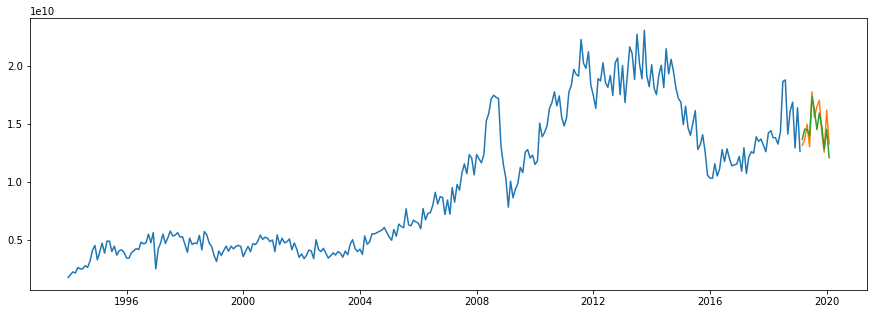

In [34]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test, label= 'Test')
plt.plot(prediction, label = 'Previsão')
plt.show()

In [35]:
from sklearn.metrics import r2_score
test['0'] = prediction
r2_score(test['y'], test['0'])

0.6367244036968529

In [37]:
test = test.drop(columns=['0'])
test

,y
ds,
2019-03-01,13132998803
2019-04-01,13628618723
2019-05-01,14968051867
2019-06-01,13028629358
2019-07-01,17759476963
2019-08-01,15569921736
2019-09-01,16495171374
2019-10-01,17027283951
2019-11-01,14172102789


In [38]:
print(f'RMSE= {mean_squared_error(test, prediction)}')

RMSE= 1.0356092313266452e+18
